# Analyse BlueSeis BSPF Event Analysis

With pressure sensor parascientific and new sensor 

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__savefig import __savefig

In [2]:
def __request_data(seed, tbeg, tend):

    from obspy.clients.fdsn import Client

    client = Client("IRIS")

    net, sta, loc, cha = seed.split(".")

    try:
        inventory = client.get_stations(network=net, 
                                         station=sta,
                                         starttime=tbeg,
                                         endtime=tend,
                                         level="response",
                                         )
    except:
        print("Failed to load inventory!")
        inventory = None
        
    try:
        waveform = client.get_waveforms(network=net,
                                       station=sta,
                                       location=loc,
                                       channel=cha, 
                                       starttime=tbeg-60,
                                       endtime=tend+60,
                                       )

    except:
        print("Failed to load waveforms!")
        waveform = None
    
    return waveform, inventory

## Configurations

In [ ]:
workdir = "/home/andbro/Documents/ROMY/BSPF"

In [3]:
config = {}

In [6]:
## blueSeis sensor
config['seed_blueseis'] = "PY.BSPF..HJ*"

## Trillium 240 next to BlueSeis on Pier
config['seed_seismometer'] = "II.PFO.10.BH*" 
# config['seed_seismometer'] = "PY.BSPF..HH*" 

## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643


## ..., California M3.2 -> good
config['tbeg'] = obs.UTCDateTime("2023-01-09 19:42:56")
config['tend'] = config['tbeg']+20
config['fmin'], config['fmax'] = 0.5, 10.0
config['magnitude'] = 3.2

config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M{config['magnitude']}"



## Event Info

In [62]:
## Peru / Ecuador 
# config['tbeg'] = obs.UTCDateTime("2022-10-05 10:26")
# config['tend'] = obs.UTCDateTime("2022-10-05 10:40")

## Near PFO  - !! with XX location code
# config['tbeg'] = obs.UTCDateTime("2022-10-05 15:39:32")
# config['tend'] = obs.UTCDateTime("2022-10-05 15:39:45")

## ---- North Pacific Ocean -> No
# config['title'] = "North Pacific Ocean | 2022-10-25 18:40 UTC | M5.8"
# config['tbeg'] = obs.UTCDateTime("2022-11-02 04:53:00")
# config['tend'] = obs.UTCDateTime("2022-11-02 05:53:00")
# config['fmin'], config['fmax'] = 0.1, 0.5

## ---- Culf of California M5.1 -> No
# config['title'] = "Central California | 2022-10-25 18:40 UTC | M5.1"
# config['tbeg'] = obs.UTCDateTime("2022-10-25 18:40:00")
# config['tend'] = obs.UTCDateTime("2022-10-25 19:00:00")
# config['fmin'], config['fmax'] = 0.1, 0.5

## ---- Local M3.8-> No
# config['title'] = "Local | 2022-10-11 06:19 UTC | M3.8"
# config['tbeg'] = obs.UTCDateTime("2022-10-11 06:19:00")
# config['tend'] = obs.UTCDateTime("2022-10-11 06:30:00")
# config['fmin'], config['fmax'] = 0.5, 15.0


## Gulf of California M6.2 -> somewhat
# config['title'] = "Gullf of California | 2022-11-04 10:02 UTC | M6.2"
# config['tbeg'] = obs.UTCDateTime("2022-11-04 10:02")
# config['tend'] = obs.UTCDateTime("2022-11-04 10:15")
# config['fmin'], config['fmax'] = 0.025, 0.2


## Gulf of California M6.4 -> alright
# config['title'] = "Baja California, Mexico | 2022-11-22 16:39 UTC | M6.4"
# config['tbeg'] = obs.UTCDateTime("2022-11-22 16:32")
# config['tend'] = obs.UTCDateTime("2022-11-22 17:00")
# config['fmin'], config['fmax'] = 0.01, 0.3

## Borrego Springs, California M4.2 -> good
config['title'] = "Borrego Springs, Ca | 2022-12-31 12:12:26 UTC | M4.2"
config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:25")
config['tend'] = obs.UTCDateTime("2022-12-31 12:13")
config['fmin'], config['fmax'] = 0.01, 10.0

## ..., California M3.2 -> good
config['tbeg'] = obs.UTCDateTime("2023-01-09 19:42:56")
config['tend'] = config['tbeg']+20
config['fmin'], config['fmax'] = 0.5, 10.0
config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M3.2"


## Load Data

In [63]:
# ## read data stream using obspy routine
# st0 = obs.read(config['datapath'], 
#                format="MSEED",
#                startime=config['tbeg']-60,
#                endtime=config['tend']+60)


# ## merge traces that might be split due to data gaps or overlaps
# st0.merge(fill_value="interpolate")

# ## cut to event
# st0.trim(config['tbeg'], config['tend'])

# ## remove mean
# st0.detrend("demean")

# ## apply taper
# st0.taper(0.1)

# ## renove sensitivity
# st0.remove_sensitivity(config['inventory'])

# ## show all traces in data stream
# print(st0)

# st0.plot(equal_scale=False);

In [64]:
py_bspf0, py_bspf_inv = __request_data(config['seed_blueseis'], config['tbeg'], config['tend'])

3 Trace(s) in Stream:
PY.BSPF..HJE | 2023-01-09T19:42:55.998300Z - 2023-01-09T19:43:15.998300Z | 200.0 Hz, 4001 samples
PY.BSPF..HJN | 2023-01-09T19:42:55.998300Z - 2023-01-09T19:43:15.998300Z | 200.0 Hz, 4001 samples
PY.BSPF..HJZ | 2023-01-09T19:42:55.998300Z - 2023-01-09T19:43:15.998300Z | 200.0 Hz, 4001 samples


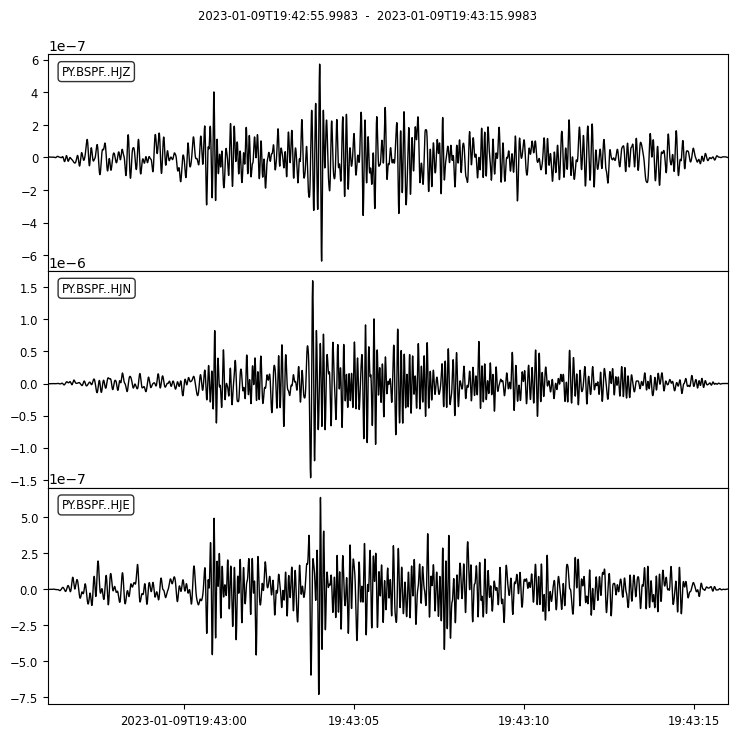

In [65]:
py_bspf = py_bspf0.copy()

## merge traces that might be split due to data gaps or overlaps
py_bspf.merge(fill_value="interpolate")

## cut to event
py_bspf.trim(config['tbeg'], config['tend'])

## renove sensitivity
py_bspf.remove_sensitivity(py_bspf_inv)

## remove mean
py_bspf.detrend("demean")

## apply taper
py_bspf.taper(0.1)

## bandpass filter
py_bspf.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

## adjust channel names
for tr in py_bspf:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","E")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","N")        
    if tr.stats.channel[-1] == "3":
        tr.stats.channel = str(tr.stats.channel).replace("3","Z")

## show all traces in data stream
print(py_bspf)

py_bspf.plot(equal_scale=False);

## Compare with Seismometer

In [66]:
ii_pfo0, ii_pfo_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])

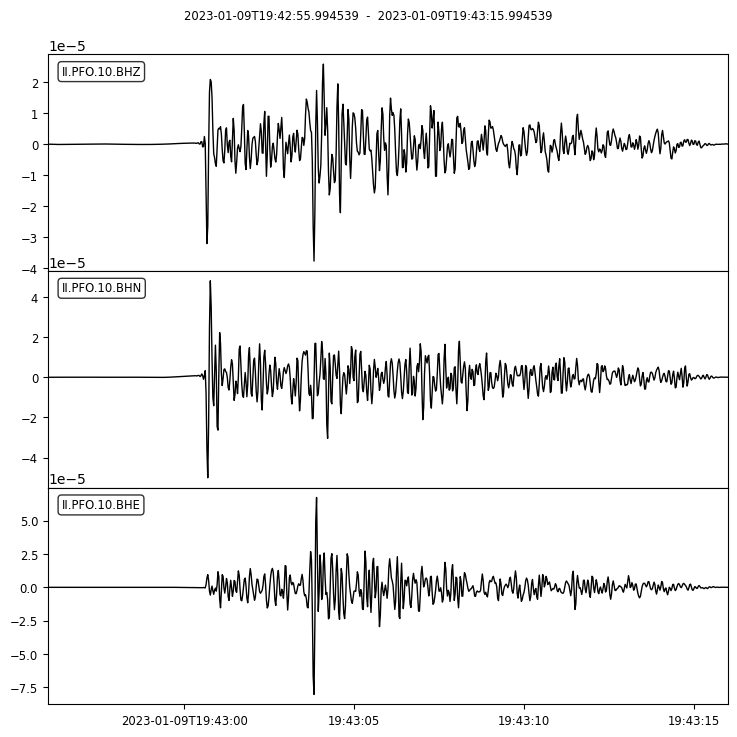

In [67]:
ii_pfo = ii_pfo0.copy()

pre_filt = [0.005, 0.01, 19, 20]

## cut properly
ii_pfo.trim(config['tbeg'], config['tend'])

## demean
ii_pfo.detrend("demean")

## remove response
ii_pfo.remove_response(inventory=ii_pfo_inv, 
#                        pre_filt=pre_filt, 
                       output="VEL",
#                        water_level=60, 
                       plot=False)

## taper 
ii_pfo.taper(0.1)

## bandpass
ii_pfo.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

## adjust channel names
for tr in ii_pfo:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","N")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","E")
        

ii_pfo.plot(equal_scale=False);

### Join Data

In [68]:
st_new = py_bspf.copy()
st_new += ii_pfo

### Plotting

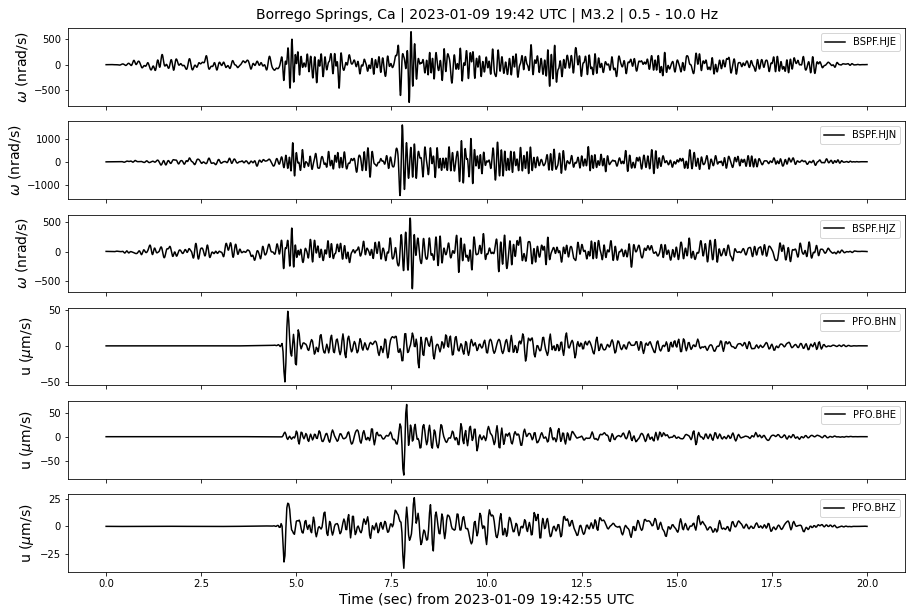

In [69]:
def __makeplot(config, st):

    fig, ax = plt.subplots(6,1, figsize=(15,10), sharex=True)

    font = 14

    time_scaling, time_unit = 1, "sec"
    rot_scaling = 1e9
    trans_scaling = 1e6
    
    for i, tr in enumerate(st):
        
        if i in [0,1,2]:
            ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*rot_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)

        elif i in [3,4,5]:
            ax[i].set_ylabel(r"u ($\mu$m/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*trans_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)
            
        ax[i].legend(loc=1)
        
    ax[5].set_xlabel(f"Time ({time_unit}) from {st[0].stats.starttime.date} {str(st[0].stats.starttime.time).split('.')[0]} UTC", fontsize=font)
    ax[0].set_title(config['title']+f" | {config['fmin']} - {config['fmax']} Hz", fontsize=font, pad=10)
    
    plt.show();
    return fig

fig = __makeplot(config, st_new)

In [52]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_event_1", mode="png", dpi=300)

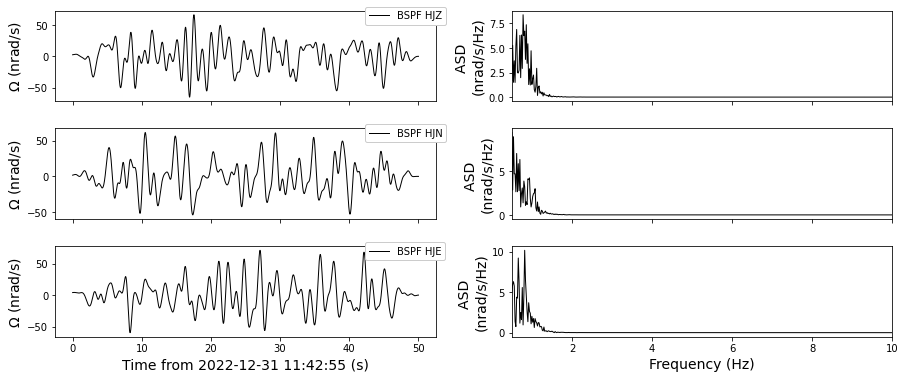

In [53]:
def __makeplotStreamSpectra2(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    import matplotlib.pyplot as plt

    NN = len(st)
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
        
    fig, axes = plt.subplots(NN,2,figsize=(15,int(NN*2)), sharex='col')

    font = 14
    
    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

#         comp_fft = abs(fftpack.fft(tr.data))
#         ff       = fftpack.fftfreq(comp_fft.size, d=1/tr.stats.sampling_rate)
#         comp_fft = fftpack.fftshift(comp_fft)
#         ff, spec = ff[1:len(ff)//2], abs(fftpack.fft(tr.data)[1:len(ff)//2])

        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling

        spec, ff, ph = __fft(tr.data*scaling, tr.stats.delta, window=None, normalize=None)
    
    
        ## _________________________________________________________________
        if tr.stats.channel[-2] == "J":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )

        elif tr.stats.channel[-2] == "H":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*trans_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
        ## _________________________________________________________________
        if fscale == "loglog":
            axes[i,1].loglog(ff, spec, color='black', lw=1.0)
        elif fscale == "loglin":
            axes[i,1].semilogx(ff, spec, color='black', lw=1.0)
        elif fscale == "linlog":
            axes[i,1].semilogy(ff, spec, color='black', lw=1.0)
        else:
            axes[i,1].plot(ff, spec, color='black', lw=1.0)         
        
        
        if tr.stats.channel[1] == "J":
            sym, unit = r"$\Omega$", rot_unit
        elif tr.stats.channel[1] == "H":
            sym, unit = "v", trans_unit
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})',fontsize=font)    
        axes[i,1].set_ylabel(f'ASD \n({unit}/Hz)',fontsize=font)        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    if "fmin" in config.keys() and "fmax" in config.keys():
        axes[i,1].set_xlim(config['fmin'],config['fmax'])

    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    axes[NN-1,1].set_xlabel(f"Frequency (Hz)",fontsize=font)     

    return fig

fig = __makeplotStreamSpectra2(st_new, config, fscale="linlin");

In [81]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_ASD_event_1", mode="png", dpi=300)

## Load ADR 

3 Trace(s) in Stream:
PY.RPFO..BJE | 2022-11-22T16:32:00.021900Z - 2022-11-22T17:00:00.021900Z | 20.0 Hz, 33601 samples
PY.RPFO..BJN | 2022-11-22T16:32:00.021900Z - 2022-11-22T17:00:00.021900Z | 20.0 Hz, 33601 samples
PY.RPFO..BJZ | 2022-11-22T16:32:00.021900Z - 2022-11-22T17:00:00.021900Z | 20.0 Hz, 33601 samples


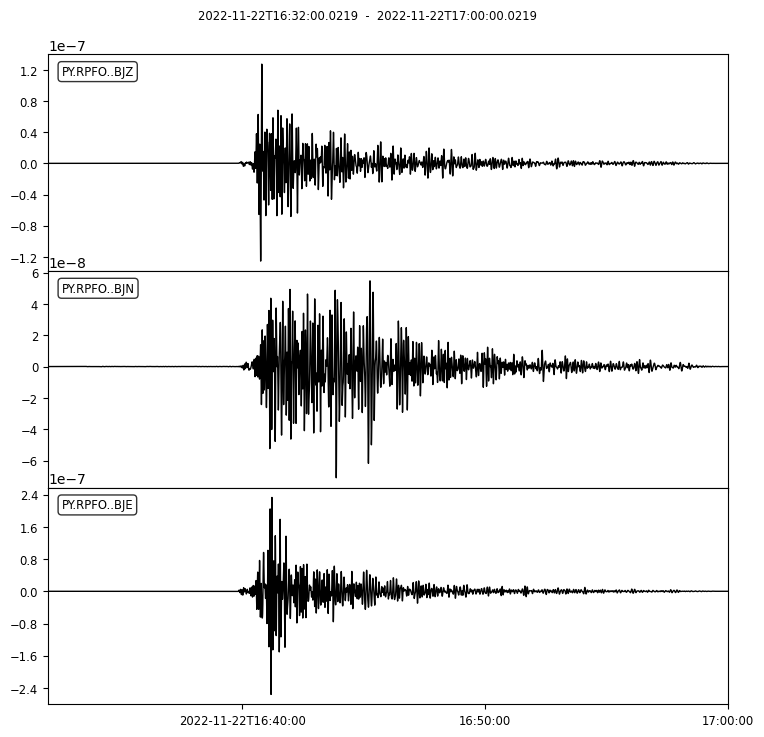

In [31]:
# datapath_adr = "/home/andbro/Downloads/tmp/BSPF/adr/*.mseed"

# datapath_adr = "/home/andbro/kilauea-data/BSPF/202211/*.mseed"
datapath_adr = "/home/andbro/Downloads/tmp/BSPF/202211/*.mseed"

## read data stream using obspy routine
st_adr = obs.read( datapath_adr, 
                   format="MSEED",
                   startime=config['tbeg']-60,
                   endtime=config['tend']+60,
                 )

# ## merge traces that might be split due to data gaps or overlaps
st_adr.merge(fill_value="interpolate")

# ## cut to event
st_adr.trim(config['tbeg'], config['tend'])

# ## remove mean
st_adr.detrend("demean")

# ## apply taper
st_adr.taper(0.1)

# ## renove sensitivity
# st_adr.remove_sensitivity(config['inventory'])

## bandpass
st_adr.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)


# ## show all traces in data stream
print(st_adr)

st_adr.plot(equal_scale=False);

## Combine Streams

In [460]:
st3 = st.copy()

## add traces
st3 += ii_pfo
st3 += st_adr

st3.sort()

## filter
config['fmin'], config['fmax'] = 0.5, 20.0
st3.detrend("demean")
st3.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)

## resample all to 40 Hz
st3.resample(40)

print(st3)
st3.plot(equal_scale=False);

NameError: name 'st0' is not defined

In [461]:
def __makeplotStreamSpectra2(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    import matplotlib.pyplot as plt

    NN = len(st)
    
    fig, axes = plt.subplots(NN,2,figsize=(15,int(NN*2)), sharex='col')

    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

#         comp_fft = abs(fftpack.fft(tr.data))
#         ff       = fftpack.fftfreq(comp_fft.size, d=1/tr.stats.sampling_rate)
#         comp_fft = fftpack.fftshift(comp_fft)
#         ff, spec = ff[1:len(ff)//2], abs(fftpack.fft(tr.data)[1:len(ff)//2])

        spec, ff, ph = __fft(tr.data, tr.stats.delta, window=None, normalize=None)

        ## _________________________________________________________________
        axes[i,0].plot(
                    tr.times(),
                    tr.data,
                    color='black',
                    label='{} {}'.format(tr.stats.station, tr.stats.channel),
                    lw=1.0,
                    )


        ## _________________________________________________________________
        if fscale == "loglog":
            axes[i,1].loglog(ff, spec, color='black', lw=1.0)
        elif fscale == "loglin":
            axes[i,1].semilogx(ff, spec, color='black', lw=1.0)
        elif fscale == "linlog":
            axes[i,1].semilogy(ff, spec, color='black', lw=1.0)
        else:
            axes[i,1].plot(ff, spec, color='black', lw=1.0)         
        
        
        if tr.stats.channel[1] == "J":
            sym, unit = "$\Omega$", "rad/s"
        elif tr.stats.channel[1] == "H":
            sym, unit = "v", "m/s"
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})')    
        axes[i,1].set_ylabel(f'ASD ({unit}/Hz)')        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    if "fmin" in config.keys() and "fmax" in config.keys():
        axes[i,1].set_xlim(config['fmin'],config['fmax'])

    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)" )     
    axes[NN-1,1].set_xlabel(f"Frequency (Hz)" )     

    return fig

fig = __makeplotStreamSpectra2(st3, config, fscale="linlin");

NameError: name 'st3' is not defined

In [ ]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_event_1", mode="png", dpi=300)

## Backazimuth

In [449]:
config['fmin'], config['fmax'] = 0.01, 0.7

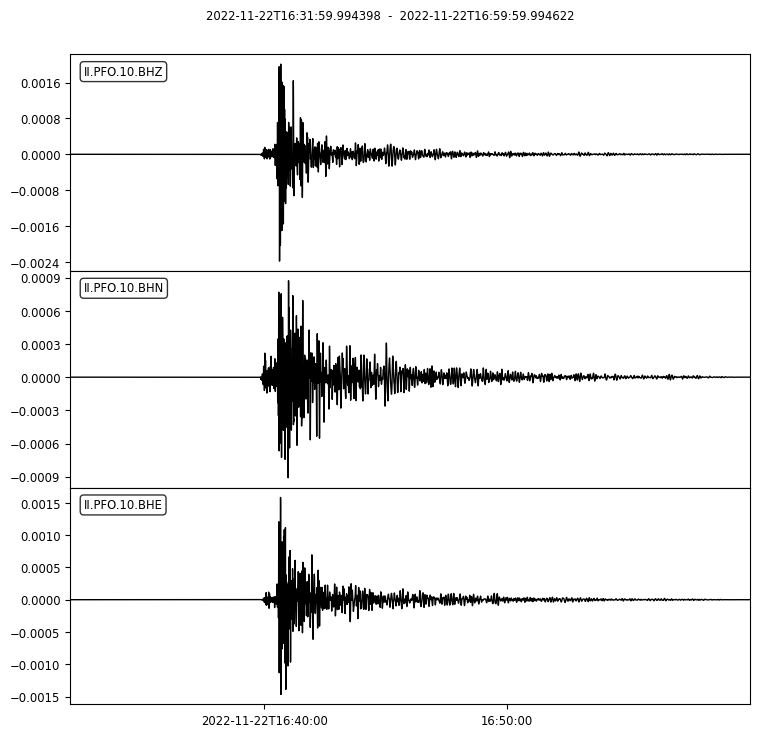

In [450]:
ii_pfo_acc = ii_pfo0.copy()

pre_filt = [0.005, 0.01, 19, 20]

## cut properly
ii_pfo_acc.trim(config['tbeg'], config['tend'])

## demean
ii_pfo_acc.detrend("demean")

## remove response
ii_pfo_acc.remove_response(inventory=ii_pfo_inv, 
                       pre_filt=pre_filt, 
                       output="ACC",
                       water_level=60, 
                       plot=False)

## taper 
ii_pfo_acc.taper(0.1)

## bandpass
ii_pfo_acc.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)

## adjust channel names
for tr in ii_pfo_acc:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","N")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","E")
        

ii_pfo_acc.plot(equal_scale=False);

3 Trace(s) in Stream:
PY.BSPF..HJE | 2022-11-22T16:32:00.001000Z - 2022-11-22T17:00:00.001000Z | 200.0 Hz, 336001 samples
PY.BSPF..HJN | 2022-11-22T16:32:00.001000Z - 2022-11-22T17:00:00.001000Z | 200.0 Hz, 336001 samples
PY.BSPF..HJZ | 2022-11-22T16:32:00.001000Z - 2022-11-22T17:00:00.001000Z | 200.0 Hz, 336001 samples


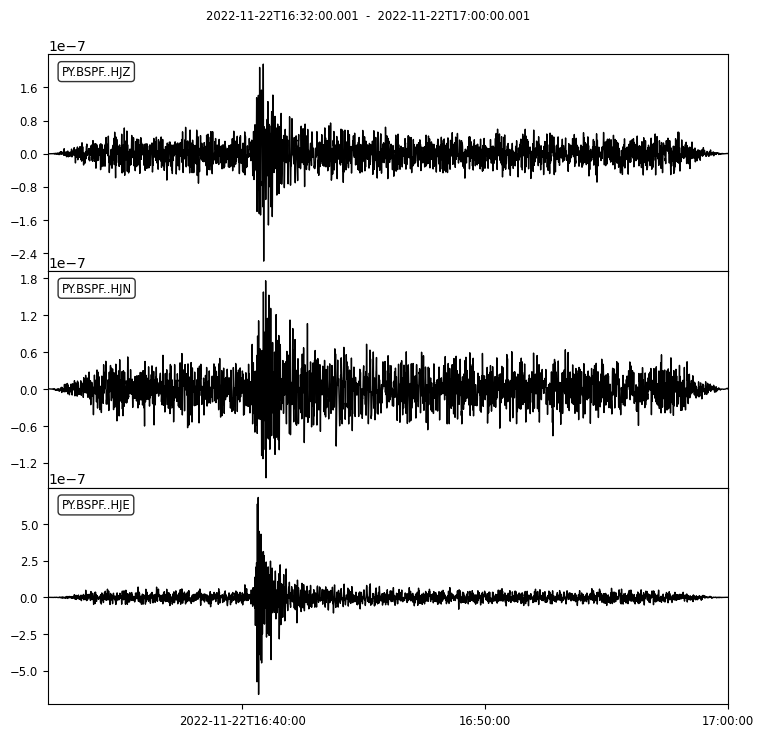

In [451]:
py_bspf = py_bspf0.copy()

## merge traces that might be split due to data gaps or overlaps
py_bspf.merge(fill_value="interpolate")

## cut to event
py_bspf.trim(config['tbeg'], config['tend'])

## renove sensitivity
py_bspf.remove_sensitivity(py_bspf_inv)

## remove mean
py_bspf.detrend("demean")

## apply taper
py_bspf.taper(0.1)

## bandpass filter
py_bspf.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)

## adjust channel names
for tr in py_bspf:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","E")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","N")        
    if tr.stats.channel[-1] == "3":
        tr.stats.channel = str(tr.stats.channel).replace("3","Z")

## show all traces in data stream
print(py_bspf)

py_bspf.plot(equal_scale=False);

In [452]:
from obspy import read, read_events, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.geodetics.base import gps2dist_azimuth
import numpy as np

t1 = config['tbeg']+1
t2 = config['tend']-1

AC = ii_pfo_acc.trim(t1, t2)
RLAS = py_bspf.resample(40).trim(t1, t2).select(component="Z")



cat = Client("ISC").get_events(starttime=t1, endtime=t2, minmagnitude=6, catalog="ISC")
event = cat[0]

# event location from event info
source_latitude = event.origins[0].latitude
source_longitude = event.origins[0].longitude

# station location (Wettzell)
station_latitude = 33.610643
station_longitude = -116.455430

print(cat)
print(event.event_descriptions[0]['type'], ': ',event.event_descriptions[0]['text'])

1 Event(s) in Catalog:
2022-11-22T16:39:06.000000Z | +30.900, -116.400 | 6.4 Mwp
Flinn-Engdahl region :  Baja California


In [453]:
# theoretical backazimuth and distance
baz = gps2dist_azimuth(source_latitude, source_longitude, station_latitude, station_longitude)

print('Epicentral distance [m]: ',np.round(baz[0],1))
print('Theoretical azimuth [deg]: ', np.round(baz[1],1))
print('Theoretical backazimuth [deg]: ', np.round(baz[2],1))

Epicentral distance [m]:  300632.3
Theoretical azimuth [deg]:  359.0
Theoretical backazimuth [deg]:  179.0


In [454]:
RLAS, AC

(1 Trace(s) in Stream:
PY.BSPF..HJZ | 2022-11-22T16:32:01.001000Z - 2022-11-22T16:59:59.001000Z | 40.0 Hz, 67121 samples,
 3 Trace(s) in Stream:
II.PFO.10.BHN | 2022-11-22T16:32:00.994622Z - 2022-11-22T16:59:58.994622Z | 40.0 Hz, 67121 samples
II.PFO.10.BHE | 2022-11-22T16:32:00.994406Z - 2022-11-22T16:59:58.994406Z | 40.0 Hz, 67121 samples
II.PFO.10.BHZ | 2022-11-22T16:32:00.994398Z - 2022-11-22T16:59:58.994398Z | 40.0 Hz, 67121 samples)

In [455]:
from obspy.signal.cross_correlation import xcorr
from obspy.signal.rotate import rotate_ne_rt

sampling_rate = int(RLAS[0].stats.sampling_rate)
sec = 10  # window length for correlation
num_windows = len(RLAS[0]) // (int(sampling_rate * sec))

# estimate the Backazimuth for each time window
step = 10
backas = np.linspace(0, 360 - step, int(360 / step))
corrbaz = []
ind=None
for i_deg in range(0, len(backas)):
    for i_win in range(0, num_windows):
        corrbazz = xcorr(RLAS[0][sampling_rate * sec * i_win : sampling_rate * sec * (i_win + 1)], 
                         rotate_ne_rt(AC.select(component='N')[0].data, 
                                      AC.select(component='E')[0].data,
                                      backas[i_deg])[1][sampling_rate * sec * i_win : sampling_rate * sec * (i_win + 1)],
                                      0,
                        )
        corrbaz.append(corrbazz[1])
        
corrbaz = np.asarray(corrbaz)
corrbaz = corrbaz.reshape(len(backas), num_windows)

maxcorr = []
for l1 in range(0, num_windows):
    maxcor_r = backas[corrbaz[:, l1].argmax()]
    maxcorr.append(maxcor_r)
maxcorr = np.asarray(maxcorr)
X, Y = np.meshgrid(np.arange(0, sec * num_windows, sec), backas)

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/signal/cross_correlation.py:390: ObsPyDeprecationWarning: Call to deprecated function xcorr(). Please use the correlate and xcorr_max functions.
  warnings.warn(msg, ObsPyDeprecationWarning)


In [456]:
from obspy.taup import TauPyModel

TauPy_model = TauPyModel('ak135')
arrivals_p = TauPy_model.get_travel_times(distance_in_degree=0.001 * baz[0] / 111.11,
                                        source_depth_in_km=event.origins[0].depth*0.001,
                                       phase_list=["P","p","Pdiff","PP","PKiKP","PKIKP","Pn","Pg"])
arrivals_s = TauPy_model.get_travel_times(distance_in_degree=0.001 * baz[0] / 111.11,
                                        source_depth_in_km=event.origins[0].depth*0.001,
                                       phase_list=["S","s","Sdiff","SS","SKiKS","SKIKS","Sn","Sg"])
tiemp = []
tiems = []
for i in range(0,len(arrivals_p)): tiemp.append(arrivals_p[i].time)
for ii in range(0,len(arrivals_s)): tiems.append(arrivals_s[ii].time)

# first arrivals
arriv_p = min(tiemp)
arriv_s = min(tiems)

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


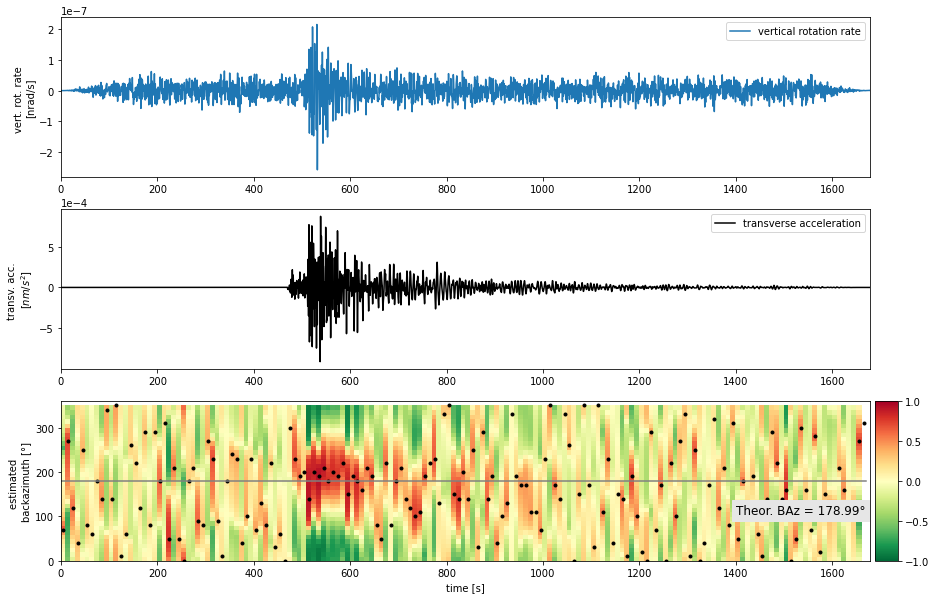

In [457]:
import matplotlib as mpl

plt.figure(figsize=(15,10))

time = np.linspace(0, len(AC[0].data)/sampling_rate,len(AC[0].data)) ## Time-array
# vertical rotation rate
plt.subplot2grid((3, 30), (0, 0), colspan=29)
plt.plot(time, RLAS[0].data,label='vertical rotation rate')
plt.xlim(0, time[-1])
plt.ylabel('vert. rot. rate \n[nrad/s]')
plt.legend()

# add P- and S-wave arrivals
# plt.axvline(arriv_p);plt.annotate('P-arrival', xy=(arriv_p+20,np.max(RLAS[0].data)),xycoords='data');
# plt.axvline(arriv_s);plt.annotate('S-arrival', xy=(arriv_s+20,np.max(RLAS[0].data)),xycoords='data');

# transverse acceleration
plt.subplot2grid((3, 30), (1, 0), colspan=29)
plt.plot(time, AC[0].data, 'k',label='transverse acceleration')
plt.xlim(0, time[-1])
plt.ylabel('transv. acc. \n[$nm/s^2$]')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
# plt.axvline(arriv_p)
# plt.axvline(arriv_s)

# backazimuth estimation plot
plt.subplot2grid((3, 30), (2, 0), colspan=29)
im = plt.pcolor(X, Y, corrbaz, cmap=plt.cm.RdYlGn_r, vmin=-1,vmax=1)
plt.plot(np.arange(sec/2., sec * num_windows, sec), maxcorr, '.k')
plt.xlim(0, time[-1])
plt.ylim(0, 360)
plt.ylabel(u'estimated \nbackazimuth [°]')
plt.xlabel('time [s]')

# plot theoretical Backazimuth for comparison
xx = np.arange(0, sec * num_windows + 1, sec)
tba = np.ones(len(xx)) * baz[2]
plt.plot(xx, tba, c='.5', lw=1.5)
plt.text(1400, 106, u'Theor. BAz = '+str(round(baz[2],2))+'°', color='k',fontsize=12,backgroundcolor='.9')


# add colorbar
fig = plt.subplot2grid((3, 30), (2, 29))
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(fig, cmap=plt.cm.RdYlGn_r, norm=norm, orientation='vertical')